In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import metrics

%matplotlib inline

In [3]:
data = load_digits(return_X_y=True)
pixel_values, targets = data
targets = targets.astype(int)

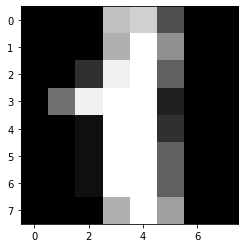

In [4]:
single_image = pixel_values[1, :].reshape(8,8)
plt.imshow(single_image, cmap='gray')

In [5]:
train_x, test_x, train_y, test_y = train_test_split(pixel_values, targets, random_state=2020, test_size=0.20)

In [9]:
for i in range(5,10):
    model_lda = LDA(n_components=i)
    model_lda.fit(train_x, train_y)
    print(f"{i} Component explains {model_lda.explained_variance_ratio_.sum()*100:.2f} Variance")

5 Component explains 84.38 Variance
6 Component explains 90.67 Variance
7 Component explains 94.91 Variance
8 Component explains 97.93 Variance
9 Component explains 100.00 Variance


In [10]:
model_lda = LDA(n_components=8)
model_lda.fit(train_x, train_y)

LinearDiscriminantAnalysis(n_components=8)

In [11]:
train_x = model_lda.transform(train_x)
test_x = model_lda.transform(test_x)

In [13]:
log_model = LogisticRegression()
log_model.fit(train_x, train_y)

predicted_values = log_model.predict(test_x)

print("Accuracy Score\n")
print(metrics.accuracy_score(test_y, predicted_values))
print("\n\n")

Accuracy Score

0.9583333333333334



